# 14. Restroom Redoubt

The concept that works on paper:

$$\begin{bmatrix}
x \\
y
\end{bmatrix}=mod\left(\begin{bmatrix}
p_{x} +t\cdot v_{x}\\
p_{y}+t\cdot v_{y}
\end{bmatrix}, \begin{bmatrix}
s_{x} \\
s_{y}
\end{bmatrix}\right)$$
Where 
- $\vec{p}$ ... initial coordinates
- $\vec{v}$ ... Robot velocity
- $\vec{s}$ ... Size of space


Part 1: 225521010
Part 2: 7774 found by hand :)


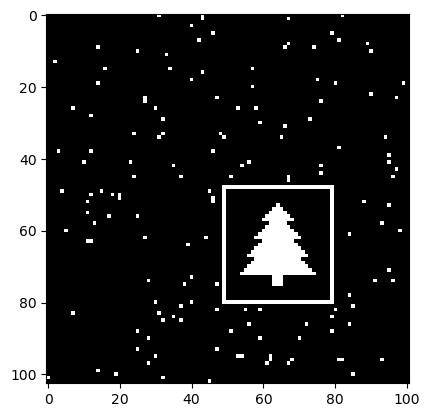

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

def ComputeRobot(px, py, vx, vy, sx, sy, t):
    x = (px + t * vx) % sx 
    y = (py + t * vy) % sy 
    
    return (x, y)

data = open("input.txt", "r").readlines()

W = 101
H = 103


EndPositions = [ComputeRobot(*map(int, re.findall(r"(-?\d+)", robot)), W, H, 100) for robot in data]

count_grid = np.zeros((H, W), dtype=int)
# Count the number of robots on each tile
for x, y in EndPositions:
    count_grid[y][x] += 1


# Filter out robots that are exactly in the middle (horizontally or vertically)
filtered_positions = [pos for pos in EndPositions if pos[0] != W // 2 and pos[1] != H // 2]

# Recalculate the quadrant sums with the filtered positions
filtered_count_grid = np.zeros((H, W), dtype=int)
for x, y in filtered_positions:
    filtered_count_grid[y][x] += 1

sums = [
    np.sum(filtered_count_grid[:H//2, :W//2]),  # Top-left quadrant
    np.sum(filtered_count_grid[:H//2, W//2:]),  # Top-right quadrant
    np.sum(filtered_count_grid[H//2:, :W//2]),  # Bottom-left quadrant
    np.sum(filtered_count_grid[H//2:, W//2:])   # Bottom-right quadrant
]

print("Part 1:", np.prod(sums))


### Part 2 ###
for t in range(7774, 7775):
    EndPositions = [ComputeRobot(*map(int, re.findall(r"(-?\d+)", robot)), W, H, t) for robot in data]

    count_grid = np.zeros((H, W), dtype=int)
    # Count the number of robots on each tile
    for x, y in EndPositions:
        count_grid[y][x] += 1
        
    # plt.imsave(f"Images\\{t}.png", count_grid, cmap = "gray")
    plt.imshow(count_grid, cmap = "gray")

    
# plt.imsave(f"Images\\{t}.png", count_grid, cmap = "gray")
plt.imshow(count_grid, cmap = "gray")
print("Part 2:", 7774, "found by hand :)")
# 225521010